<div class="alert alert-info" style="background-color:DodgerBlue; color:white; padding:0px 5px; border-radius:15px; opacity: 0.8; border-color:DodgerBlue">
    <h2 style='margin:10px 5px; font-size:35px; text-align: center'> Progetto Finale - Programming with Python 
    </h2>
</div>

<div class="alert alert-info" style="background-color:orange; color:black; padding:0px 5px; border-radius:15px; border-color:orange">
    <h2 style='margin:10px 5px; font-size:14px; font-style:italic; text-align: center'> Studenti: Laura Proto & Giacomo de Gioia </h2>
</div>

<div class="alert alert-info" style="background-color:LightGrey; color:black; padding:0px 5px; border-radius:15px; border-color:LightGrey">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 0. Installazioni e Import preliminari </h2>
</div>

In [1]:
#Install all the libraries the project needs
#Please lauch from a command line shell Python, NOT HERE, the code:
#pip install -r requirements.txt  ----------------> RICORDATI DI AGGIORNARLO (troppo complesso da automatizzare)

#fatti dire da python il numero della versione e riportala nel file - file dichiarativi
#print(googletrans.__version__)
#pip show scikit-learn
#pip freeze

In [2]:
#python3.8
#Import usefull
import os
import utils as ut
import timeit
import numpy as np #Package for array
import pandas as pd #Powerful data structures for data analysis, time series, and statistics
import seaborn as sns #Statistical data visualization
import matplotlib.pyplot as plt #Python plotting package
import plotly.express as px #Interactive data visualization
import plotly.io as pio #used for pie chart
import sklearn #set of python modules for machine learning and data mining
import scipy as sp #Fundamental algorithms for scientific computing in Python
import googletrans #Free Google Translate API for Python

from utils import TranslatorColumnRow
from datetime import datetime
from googletrans import Translator, constants
from pprint import pprint
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, normalized_mutual_info_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.cluster import pair_confusion_matrix, rand_score
from sklearn.metrics import confusion_matrix  ###usato o no?
from sklearn.decomposition import PCA
import warnings #only for os
warnings.filterwarnings("ignore") #only for os

In [3]:
#pip list --outdated

In [4]:
#pip show pyautogui

In [5]:
#pip freeze

<div class="alert alert-info" style="background-color:white; color:black; padding:0px 5px; border-radius:15px;  border-style: dashed; border-color: black">
    <h2 style='margin:10px 5px; font-size:25px'> 1. Analisi dei dati </h2>
</div>

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:17px;'> 1a. File class.csv </h2>
</div>

In [6]:
#Chose what you prefer: Show/Save/Both (or press Enter to skip)
result= ut.chose('class.csv')
df_class = result[0]

Visualizzare l'analisi(1) \ Salvare l'analisi in un file.txt(2) \ Entrambe(3)?

Hai scelto di non fare nulla



In [7]:
#Change name's column Number_Of_Animal_Species_In_Class from df_class before done Graphics
df_class.rename(columns={'Number_Of_Animal_Species_In_Class': 'Animals_by_Species'}, inplace=True)

In [8]:
#Pie Graphic of Animal Class Types Distribution
fig = px.pie(df_class, values='Animals_by_Species', names='Class_Type', title='Animal Class Types Distribution', hole=0.40, width=700, height=500)
fig.update_layout(title_x=0.5)
pio.write_image(fig,'3.Graphics/Distribuzione classi animali.png')
fig.show()

#### Osservazioni:
<font color=blue>
Questo dataframe servirà solo a valle dell'applicazione di ogni algoritmo per confrontare i dati che otterremo. Da qui in avanti ci concentreremo sul dataframe principale zoo.csv </font>

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:17px;'> 1b. File zoo.csv </h2>
</div>

In [9]:
#Chose what you prefer: Show/Save/Both (or press Enter to skip)
result= ut.chose('zoo.csv')
df_zoo = result[1]

Visualizzare l'analisi(1) \ Salvare l'analisi in un file.txt(2) \ Entrambe(3)?

Hai scelto di non fare nulla



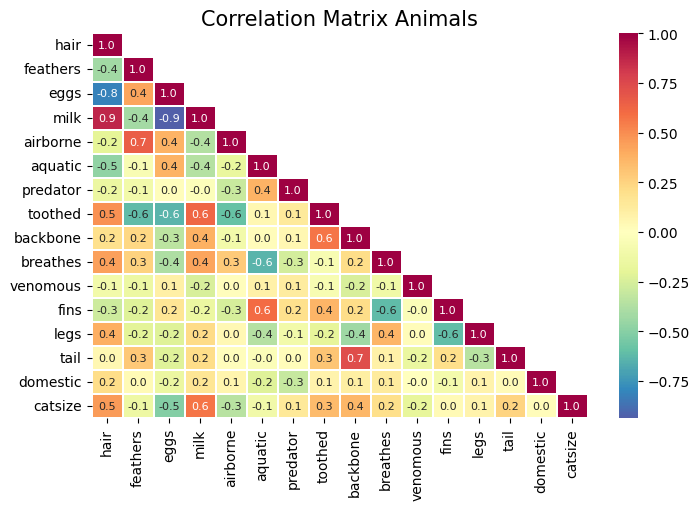

In [10]:
#delete also column class_type 
df_zoo_nc = df_zoo.drop(['class_type'],axis=1) #Temporarily removed for a better confusion matrix's version

#Data correlation control
ut.correlation_matrix(df_zoo_nc)

#### Osservazioni:
Dalla correlation matrix emerge che ci sono 8 coppie di feautures strettamente correlate (valori da -0,9 a 0,9).
Valori negativi e cosa indicano:
- eggs-hair (-0,8) 
    -> un animale che produce uova molto difficilmente ha la pelliccia
- toothed-eggs (-0,7)
    -> un animale che produce uova difficilmente ha i denti
- breathers-aquatic (-0,7)
    -> un animale che respira difficilmente è acquatico
- milk-eggs (-1,0)
    -> un animale che produce uova NON produce anche il latte

Valori positivi:
- airborne-feathers (0,7)
    -> un animale che ha la capacità di volare è probabile che ha le piume
- toothed-milk (0,7)
    -> un animale con i denti è probabile che produce latte
- tail-backbone (0,7)
    -> un animale con la coda è probabile che è un vertebrato
- milk-hair (0,9)
     -> un animale che produce latte MOLTO probailmente ha la pelliccia

#### Azioni:
Per analizzare il dataset, a partire da una conoscenza elementare della biologia, traduciamo i nomi delle feature e degli animali per capire se ci sono errori di coerenza tra l'animale e le sue caratteristiche. 

https://zetcode.com/python/googletrans/

In [11]:
#Class that translate the first row and the first coloumn in fews minutes - please wait
#Attention!! On os it almost always works, on windows sometimes you need to run several times!
start_time = timeit.default_timer()
ut.translator = TranslatorColumnRow('1.Input/zoo.csv')
end_time = timeit.default_timer()
print("Execution time:", end_time - start_time)

Execution time: 38.247105198999996


In [12]:
#Rename df and check values
df_zoo = ut.translator.df
df_zoo.head(1)

animal_name (nome_animale)  hair (capelli)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)               1                 0            0   

   milk (latte)  airborne (aereo)  aquatic (acquatico)  predator (predatore)  \
0             1                 0                    0                     1   

   toothed (dentata)  backbone (spina dorsale)  breathes (respira)  \
0                  1                         1                   1   

   venomous (velenoso)  fins (a)  legs (gambe)  tail (coda)  \
0                    0         0             4            0   

   domestic (domestico)  catsize (catsize)  class_type (tipo_classe)  
0                     0                  1                         1

In [13]:
#change incorrect translations in columns name
df_zoo = df_zoo.rename(columns={
    'hair (capelli)': 'hair (pelliccia)',
    'airborne (aereo)': 'airborne (volante)',
    'toothed (dentata)':  'toothed (dentato)',
    'backbone (spina dorsale)': 'backbone (vertebrato)',
    'fins (a)': 'fins (pinne)',
    'legs (gambe)': 'legs (zampe)'
})
col_list = df_zoo.columns.tolist()[1:]
df_zoo.head()

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   
1        antelope (antilope)                 1                 0            0   
2               bass (basso)                 0                 0            1   
3                bear (orso)                 1                 0            0   
4           boar (cinghiale)                 1                 0            0   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   
1             1                   0                    0   
2             0                   0                    1   
3             1                   0                    0   
4             1                   0                    0   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   
1                     0                  1                      1   
2                     1                  1                      1   
3                     1                  1                      1   
4                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   
1                   1                    0             0             4   
2                   0                    0             1             0   
3                   1                    0             0             4   
4                   1                    0             0             4   

   tail (coda)  domestic (domestico)  catsize (catsize)  \
0            0                     0                  1   
1            1                     0                  1   
2            1                     0                  0   
3            0                     0                  1   
4            1                     0                  1   

   class_type (tipo_classe)  
0                         1  
1                         1  
2                         4  
3                         1  
4                         1

In [14]:
# create a new list containing the values of the first column of df for check animal's name
name_list = df_zoo.iloc[:, 0].values.tolist()
print(name_list)

['aardvark (oritteropo)', 'antelope (antilope)', 'bass (basso)', 'bear (orso)', 'boar (cinghiale)', 'buffalo (bufalo)', 'calf (vitello)', 'carp (carpa)', 'catfish (pesce gatto)', 'cavy (cavia)', 'cheetah (ghepardo)', 'chicken (pollo)', 'chub (cavedano)', 'clam (mollusco)', 'crab (granchio)', 'crayfish (gambero)', 'crow (corvo)', 'deer (cervo)', 'dogfish (palombo)', 'dolphin (delfino)', 'dove (dove)', 'duck (anatra)', 'elephant (elefante)', 'flamingo (fenicottero)', 'flea (pulce)', 'frog (rana)', 'frog (rana)', 'fruitbat (volpe volante)', 'giraffe (giraffa)', 'girl (ragazza)', 'gnat (moscerino)', 'goat (capra)', 'gorilla (gorilla)', 'gull (gabbiano)', 'haddock (eglefino)', 'hamster (criceto)', 'hare (lepre)', 'hawk (falco)', 'herring (aringa)', 'honeybee (ape)', 'housefly (mosca domestica)', 'kiwi (kiwi)', 'ladybird (coccinella)', 'lark (allodola)', 'leopard (leopardo)', 'lion (leone)', 'lobster (aragosta)', 'lynx (lince)', 'mink (visone)', 'mole (neo)', 'mongoose (mangusta)', 'moth (fa

In [15]:
#change incorrect translations in animal's name
ut.update_animal_name(df_zoo, 'bass (basso)', 'bass (persico)')
ut.update_animal_name(df_zoo, 'chub (cavedano)', 'chub (pesce cavedano)')
ut.update_animal_name(df_zoo, 'dogfish (palombo)', 'dogfish (squalo)')
ut.update_animal_name(df_zoo, 'dove (dove)', 'dove (piccione)')
ut.update_animal_name(df_zoo, 'haddock (eglefino)', 'haddock (pesce eglefino)')
ut.update_animal_name(df_zoo, 'kiwi (kiwi)', 'kiwi (uccello kiwi)')
ut.update_animal_name(df_zoo, 'mole (neo)', 'mole (talpa)')
ut.update_animal_name(df_zoo, 'pussycat (micio)', 'pussycat (gatto)')
ut.update_animal_name(df_zoo, 'rhea (nandù)', 'rhea (uccello nandù)')
ut.update_animal_name(df_zoo, 'sealion (sigillatura)', 'sealion (leone marino)')#a volte la traduzione è corretta
ut.update_animal_name(df_zoo, 'seawasp (vespa marina)', 'seawasp (medusa)') #a volte lo traduce così
ut.update_animal_name(df_zoo, 'seawasp (seawasp)', 'seawasp (medusa)') #a volte lo traduce così
ut.update_animal_name(df_zoo, 'skimmer (skimmer)', 'skimmer (uccello skimmer)')
ut.update_animal_name(df_zoo, 'skua (skua)', 'skua (uccello skua)')
ut.update_animal_name(df_zoo, 'sole (sole)', 'sole (sogliola)')
ut.update_animal_name(df_zoo, 'vampire (vampiro)', 'vampire (pipistrello)')
ut.update_animal_name(df_zoo, 'vole (piacerebbe)', 'vole (roditore)')
ut.update_animal_name(df_zoo, 'wren (scricciolo)', 'wren (uccello scricciolo)')

Ho modificato 'bass (basso)' con 'bass (persico)' 
Ho modificato 'chub (cavedano)' con 'chub (pesce cavedano)' 
Ho modificato 'dogfish (palombo)' con 'dogfish (squalo)' 
Ho modificato 'dove (dove)' con 'dove (piccione)' 
Ho modificato 'haddock (eglefino)' con 'haddock (pesce eglefino)' 
Ho modificato 'kiwi (kiwi)' con 'kiwi (uccello kiwi)' 
Ho modificato 'mole (neo)' con 'mole (talpa)' 
Ho modificato 'pussycat (micio)' con 'pussycat (gatto)' 
Ho modificato 'rhea (nandù)' con 'rhea (uccello nandù)' 
Nessun animale trovato che inizi con 'sealion (sigillatura)' 
Nessun animale trovato che inizi con 'seawasp (vespa marina)' 
Ho modificato 'seawasp (seawasp)' con 'seawasp (medusa)' 
Ho modificato 'skimmer (skimmer)' con 'skimmer (uccello skimmer)' 
Ho modificato 'skua (skua)' con 'skua (uccello skua)' 
Ho modificato 'sole (sole)' con 'sole (sogliola)' 
Ho modificato 'vampire (vampiro)' con 'vampire (pipistrello)' 
Ho modificato 'vole (piacerebbe)' con 'vole (roditore)' 
Ho modificato 'wren 

In [16]:
df_zoo.head(1)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   

   tail (coda)  domestic (domestico)  catsize (catsize)  \
0            0                     0                  1   

   class_type (tipo_classe)  
0                         1

#### Osservazioni:
Di norma i dataset sono di grandi dimensione e non è possibile verificare l'esattezza/coerenza dei dati (ne compito del'analista farlo). In questo caso progetto però la numerosità dei dati lo consente e lo facciamo al fine di prendere dimestichezza con la manipolazione del dataset.


Dati errati da correggere con valore corretto da aggiornare:

--> campo = **eggs (uova)**
- seasnake (serpente di mare) depone uova (1)

</br> --> campo = **aquatic (acquatico)**
- clam (mollusco) è acquatico (1)

</br> --> campo = **predator (predatore)**
- boar (cinghiale) NON è un predatore (0)
- clam (mollusco) NON è un predatore (0)

</br> --> campo = **toothed (dentato)**
- carp (carpa) NON ha i denti (0)
- frog (rana) NON hanno denti (0)
- seahorse (cavalluccio marino) NON ha denti (0)

</br> --> campo = **fins (pinne)**
- sealion (leone marino) ha solo pinne (1)

</br> --> campo = **legs (zampe)**
- crab (granchio) ha 10 zampe e NON 4
- crayfish (gambero) ha 10 zampe e NON 6
- gorilla (gorilla) ha 4 zampe
- lobster (aragosta) ha 10 zampe e NON 6
- sealion (leone marino) NON ha zampe (0)
- wallaby (canguro) ha 4 zampe
- starfish (stella marina) NON ha zampe (0)
- octopus (polpo) NON ha zampe (0)

</br> --> campo = **tail (coda)**
- aardvark (oritteropo) ha la coda (1)
- bear (orso) ha la coda (1)
- fruitbat (volpe volante) è un pipistrello quindi NON ha la coda (0)
- kiwi (uccello kiwi) NON ha la coda (0)
- lobster (aragosta) ha la coda (1)

</br> --> **valori duplicati** 
- ci sono 2 frog (rana), una velenosa, l'altra no - rinominarne una!

#### Azioni:
Procedo alla modifica dei valori errati colonna per colonna

In [17]:
#dictionary with the changes to be made
modifications = {
    'eggs (uova)': {'seasnake (serpente di mare)': 1},
    'aquatic (acquatico)': {'clam (mollusco)': 1},
    'predator (predatore)': {'boar (cinghiale)': 0, 'clam (mollusco)': 0},
    'toothed (dentato)': {'carp (carpa)': 0, 'frog (rana)': 0, 'seahorse (cavalluccio marino)': 0},
    'fins (pinne)': {'sealion (leone marino)': 1},
    'legs (zampe)': {'crab (granchio)': 10, 'crayfish (gambero)': 10, 'gorilla (gorilla)': 4, 'sealion (leone marino)': 0,'wallaby (canguro)': 4, 'starfish (stella marina)': 0, 'octopus (polpo)': 0},
    'tail (coda)': {'aardvark (oritteropo)': 1, 'bear (orso)': 1, 'fruitbat (volpe volante)': 0, 'kiwi (uccello kiwi)': 0, 'lobster (aragosta)': 1}
}
#change errors in dataframe
for col, mod_dict in modifications.items():
    ut.modify_column(df_zoo, 'animal_name (nome_animale)', col, mod_dict)

Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate
Le modifiche indicate sono state apportate


#### Azioni:
Cerco i nomi degli animali duplicati; ci dovrebbe essere solo la rana. (non si tratta di un record duplicato: una rana è velenosa, l'altra no)

In [18]:
#extract animal_name colum
col_animal_name = 'animal_name (nome_animale)'
animal_names = df_zoo[col_animal_name]

#search duplicate name and print
duplicated_animals = df_zoo[animal_names.duplicated(keep=False)]
print(duplicated_animals[col_animal_name].unique())

['frog (rana)']


#### Azioni:
Cerchiamo la posizione di rana e rinominiamo una delle due.

In [19]:
#search position of rana
idx_rana = df_zoo.index[df_zoo['animal_name (nome_animale)'] == 'frog (rana)']
print(idx_rana)

Int64Index([25, 26], dtype='int64')


In [20]:
#change second rana in rana vel and check
df_zoo.loc[26, 'animal_name (nome_animale)'] = 'frog2 (rana vel)'
df_zoo.iloc[25:27]

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  \
25                frog (rana)                 0                 0   
26           frog2 (rana vel)                 0                 0   

    eggs (uova)  milk (latte)  airborne (volante)  aquatic (acquatico)  \
25            1             0                   0                    1   
26            1             0                   0                    1   

    predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
25                     1                  0                      1   
26                     1                  0                      1   

    breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
25                   1                    0             0             4   
26                   1                    1             0             4   

    tail (coda)  domestic (domestico)  catsize (catsize)  \
25            0                     0                  0   
26            0                     0                  0   

    class_type (tipo_classe)  
25                         5  
26                         5

#### Azioni:
Rinominiamo ed esportiamo in csv il dataset pulito che utilizzeremo successivamente

In [21]:
#export to csv 
df_zoo_cln = df_zoo
df_zoo_cln.to_csv('zoo_cln.csv', index=False)
df_new = pd.read_csv('zoo_cln.csv')
df_new.head(3)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   
1        antelope (antilope)                 1                 0            0   
2             bass (persico)                 0                 0            1   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   
1             1                   0                    0   
2             0                   0                    1   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   
1                     0                  1                      1   
2                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   
1                   1                    0             0             4   
2                   0                    0             1             0   

   tail (coda)  domestic (domestico)  catsize (catsize)  \
0            1                     0                  1   
1            1                     0                  1   
2            1                     0                  0   

   class_type (tipo_classe)  
0                         1  
1                         1  
2                         4

In [22]:
df_new #df complete
df_nc = df_new.drop(['class_type (tipo_classe)'],axis=1) #df without class_type column

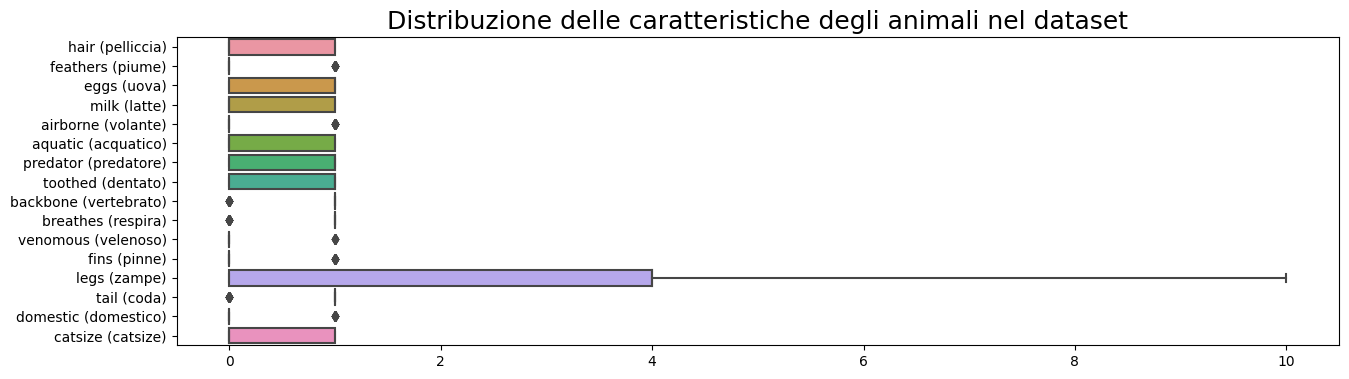

In [23]:
#Graphic representations of animal's values (no class_type)
plt.figure(figsize = (15,4))
sns.boxplot(data= df_nc, orient = "h") 
plt.title("Distribuzione delle caratteristiche degli animali nel dataset", fontsize=18)
plt.show()

COMMENTARE MEGLIO---CHIEDI A GIACOMO?

#### Osservazioni:
Il grafico boxplot rappresenta chiaramente la distribuzione dei dati numerici delle features. L'unica caratteristica che si discosta in modo considerevole dalle altre, non essendo binaria, è legs

| -> valore anomalo che si discosta dalla distribuzione principale dei dati

rombo -> valore + anomalo di |

le scatole colorate sono distribuzioni omogenee

#### Azioni:
Prima di procedere con l'applicazione degli algoritmi indaghiamo su possibili raggruppamenti in base alla caratteristica legs, l'unica con valori diversi da 0 e 1,

In [24]:
#Group by legs the 
gruppi = df_new.groupby(['legs (zampe)'])

for num, (nome, gruppo) in enumerate(gruppi):
    print('Gruppo', num+1)
    for index, row in gruppo.iterrows(): 
        #scorro righe di Gruppo restituendo indice di riga e i suoi valori, creando 2 variabili
        #indice è la posizione della riga e row i suoi valori
        if row['legs (zampe)'] > 0:
            print('',row["animal_name (nome_animale)"],"zampe (",row["legs (zampe)"],")") #"row['nome_colonna']" struttura x accedere ai valori
        else:
            print('',row["animal_name (nome_animale)"],"pinne (",row["fins (pinne)"],")")
    print('Totale:', len(gruppo),'\n') 

Gruppo 1
 bass (persico) pinne ( 1 )
 carp (carpa) pinne ( 1 )
 catfish (pesce gatto) pinne ( 1 )
 chub (pesce cavedano) pinne ( 1 )
 clam (mollusco) pinne ( 0 )
 dogfish (squalo) pinne ( 1 )
 dolphin (delfino) pinne ( 1 )
 haddock (pesce eglefino) pinne ( 1 )
 herring (aringa) pinne ( 1 )
 octopus (polpo) pinne ( 0 )
 pike (luccio) pinne ( 1 )
 piranha (piranha) pinne ( 1 )
 pitviper (vipera) pinne ( 0 )
 porpoise (focena) pinne ( 1 )
 seahorse (cavalluccio marino) pinne ( 1 )
 seal (foca) pinne ( 1 )
 sealion (leone marino) pinne ( 1 )
 seasnake (serpente di mare) pinne ( 0 )
 seawasp (medusa) pinne ( 0 )
 slowworm (orbettino) pinne ( 0 )
 slug (lumaca) pinne ( 0 )
 sole (sogliola) pinne ( 1 )
 starfish (stella marina) pinne ( 0 )
 stingray (razza) pinne ( 1 )
 tuna (tonno) pinne ( 1 )
 worm (verme) pinne ( 0 )
Totale: 26 

Gruppo 2
 chicken (pollo) zampe ( 2 )
 crow (corvo) zampe ( 2 )
 dove (piccione) zampe ( 2 )
 duck (anatra) zampe ( 2 )
 flamingo (fenicottero) zampe ( 2 )
 fruit

#### Osservazioni:
Utilizzando il group by sulle caratteristiche zampe e pinne abbiamo un primo risultato interessante che ha come risultato, seppur approssimativo, un numero di gruppi molto simile alle 'etichette' nel file class.csv

<div class="alert alert-info" style="background-color:LightGree; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 2. Applicazione degli algoritmi di clustering </h2>
</div>

#### Azioni:
Applicheremo, in sequenza, i tre principali algoritmi dell'apprendimento non supervisionato:

1 - **K-Means**

2 - **Clustering gerarchico**

3 - **DBScan**


SPECIFICARE LA DIFFERENZA TRA I TRE

In [25]:
#used version df without column class_type
df_nc.shape

(101, 17)

In [26]:
df_nc.head(1)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   

   tail (coda)  domestic (domestico)  catsize (catsize)  
0            1                     0                  1

In [27]:
X = df_nc.iloc[:, 1:17].values  #select all
y = df_nc.iloc[:, -4].values  #select legs column
n_samples, n_features = X.shape
n_samples, n_features

(101, 16)

<div class="alert alert-info" style= "background-color:white; color:green; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> La riduzione della complessita con T-Sne </h2>
</div>

Esegue la riduzione della dimensionalità non lineare utilizzando t-Distributed Stochastic Neighbor Embedding (t-SNE).

In [28]:
#df_new2.head(1)
type(X)

numpy.ndarray

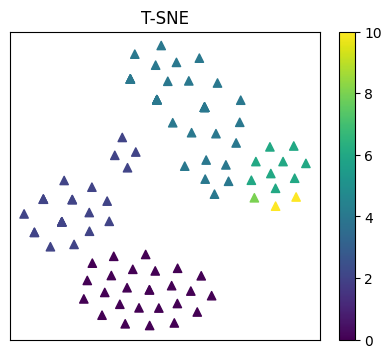

In [76]:
#with T-SNE we reduces complexity by taking space from 14 dimensions to 2 for graphical representation
data_reduced =ut.t_sne(X, n_components=2, n_iter=500, n_iter_without_progress=150, n_jobs=2, random_state=0)

#Scatter plot of T-SNE
ut.scatter_plot(data_reduced, c=y, title='T-SNE', cmap='viridis', marker='^')
plt.savefig('3.Graphics/T-SNE_Lancio1.png')
plt.show()

IPERPIANO DIFFICILMENTE DIVISIBILE

#### Osservazioni:
I valori della variabile X sono stati sostituiti con le *nuove coordinate bidimensionali*, calcolate dall'algoritmo t-SNE per rappresentare i dati in uno spazio a due dimensioni, quindi X non rappresenta più il dataset originale ma la sua rappresentazione a due dimensioni ottenuta dall'algoritmo t-SNE.

Nel nostro caso y è la colonna contenente il numero di zampe quindi il plot mostra nella color bar il numero di zampe, con colore associato, e nell'area del grafico i raggruppamenti relativi. 
I raggruppamenti sembrano 6 (in senso anti-orario): 
1. viola 2. blu notte 3. verde ottanio 4. verde acqua 5. verde lime 6. giallo

Il risultato rispecchia il groupby fatto precedentemente nella sezione 1. Analisi dei dati

<div class="alert alert-info" style= "background-color:white; color:red; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> L'algoritmo K-Means </h2>
</div>

Assegna i punti in base alla distanza dal centroide

### K-Means con init 'random'

#### Osservazioni:
Inizializzazione causale dei centroidi 

**Centroidi** = punti geometrici che rappresentano il centro di massa di un cluster 

**Cluster** = insiemi di punti simili che vengono raggruppati insieme dall'algoritmo di clustering

In [87]:
#take data's T-Sne
X = data_reduced

#K-Means - init 'random' (selected 7 clusters to compare with class.csv)
kmeans, y_km_clustering= ut.km_clust(X, n_clusters=7, init='random', 
                                           n_init=10, max_iter=300, tol=1e-4)
#NB:
#I can call the 2 vars how I want to recall two results of def.
#es: km e y_km == kmeans, y_km_clustering
#es: k e array == kmeans, y_km_clustering

Etichette univoche dei cluster: [1 2 3 4 5 6 7]


In [88]:
#Extract the algorithm's results
df_cl=ut.results_group(X, df_nc, y_km_clustering, 'K-Mean')

Algoritmo K-Mean 

Pred Labels 1
crab (granchio)
crayfish (gambero)
flea (pulce)
frog (rana)
frog2 (rana vel)
gnat (moscerino)
honeybee (ape)
housefly (mosca domestica)
ladybird (coccinella)
lobster (aragosta)
moth (falena)
newt (tritone)
platypus (ornitorinco)
scorpion (scorpione)
termite (termite)
toad (rospo)
tuatara (tuatara)
wasp (vespa)
Totale: 18 

Pred Labels 2
chicken (pollo)
crow (corvo)
dove (piccione)
duck (anatra)
flamingo (fenicottero)
gull (gabbiano)
hawk (falco)
kiwi (uccello kiwi)
lark (allodola)
ostrich (struzzo)
parakeet (parrocchetto)
pheasant (fagiano)
skimmer (uccello skimmer)
skua (uccello skua)
sparrow (passero)
swan (cigno)
vulture (avvoltoio)
wren (uccello scricciolo)
Totale: 18 

Pred Labels 3
fruitbat (volpe volante)
girl (ragazza)
penguin (pinguino)
rhea (uccello nandù)
squirrel (scoiattolo)
tortoise (tartaruga)
vampire (pipistrello)
Totale: 7 

Pred Labels 4
bass (persico)
catfish (pesce gatto)
dogfish (squalo)
dolphin (delfino)
herring (aringa)
pike (lucc

In [89]:
#save df_cl in new df_res_km_random
df_km_random = df_cl.copy()
df_km_random.head()

Animal Pred Labels
0  aardvark (oritteropo)           5
1    antelope (antilope)           6
2         bass (persico)           4
3            bear (orso)           5
4       boar (cinghiale)           6

### K-Means con init 'k-means++'
kmeans ++ definisce tante inizializzazioni e seleziona quella che massimizza l'inerzia 

In [90]:
#K-Means - init 'k-means++' (selected 7 clusters to compare with class.csv)
kmeans, y_kmplus_clustering = ut.km_clust(X, n_clusters=7, init='k-means++', 
                                               n_init=10, max_iter=300, tol=1e-4, random_state=1234)

Etichette univoche dei cluster: [1 2 3 4 5 6 7]


Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]


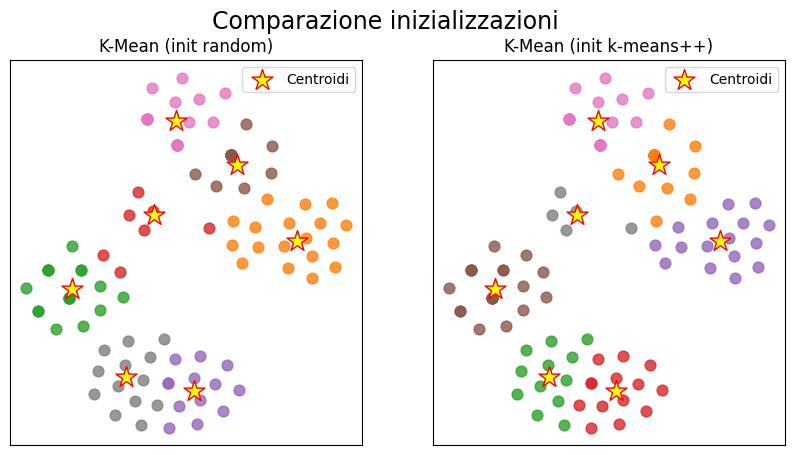

In [95]:
#Comparing different init
kmean, y_km = ut.km_clust(X, 7, 'random') #NB:the other parameters are preset, don't need to be specified
kmean, y_kmplus = ut.km_clust(X, 7, 'k-means++') #NB:the other parameters are preset, don't need to be specified

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ut.plot_kmean(X,y_km, kmean.cluster_centers_, 'K-Mean (init random)', ax=ax1)
ut.plot_kmean(X,y_kmplus, kmean.cluster_centers_, 'K-Mean (init k-means++)', ax=ax2)
fig.suptitle("Comparazione inizializzazioni", fontsize=17)
plt.savefig('3.Graphics/Comparazione inizializzazioni KMean_Lancio1.png')
plt.show()

#### Osservazioni:
Il risultato delle due differenti inizializzazioni è differente: **K-means++** si adatta meglio al numero dicluster indicato. Init random invece non ha trovato il centroide dell cluster in viola e ne ha assegnati due al clluster arancione.

In [96]:
#Extract the algorithm's results
df_cl=ut.results_group(X, df_nc, y_kmplus_clustering, 'K-Mean++')

Algoritmo K-Mean++ 

Pred Labels 1
crab (granchio)
crayfish (gambero)
flea (pulce)
frog (rana)
frog2 (rana vel)
gnat (moscerino)
honeybee (ape)
housefly (mosca domestica)
ladybird (coccinella)
lobster (aragosta)
moth (falena)
newt (tritone)
scorpion (scorpione)
termite (termite)
toad (rospo)
tuatara (tuatara)
wasp (vespa)
Totale: 17 

Pred Labels 2
chicken (pollo)
crow (corvo)
dove (piccione)
duck (anatra)
flamingo (fenicottero)
gull (gabbiano)
hawk (falco)
kiwi (uccello kiwi)
lark (allodola)
ostrich (struzzo)
parakeet (parrocchetto)
penguin (pinguino)
pheasant (fagiano)
rhea (uccello nandù)
skimmer (uccello skimmer)
skua (uccello skua)
sparrow (passero)
swan (cigno)
vulture (avvoltoio)
wren (uccello scricciolo)
Totale: 20 

Pred Labels 3
antelope (antilope)
boar (cinghiale)
buffalo (bufalo)
calf (vitello)
cavy (cavia)
deer (cervo)
elephant (elefante)
giraffe (giraffa)
goat (capra)
gorilla (gorilla)
hamster (criceto)
hare (lepre)
oryx (orice)
pony (pony)
reindeer (renna)
vole (roditore

In [97]:
#save df_cl in new df_res_km_plus
df_km_plus = df_cl.copy()
df_km_plus.head(3)

Animal Pred Labels
0  aardvark (oritteropo)           6
1    antelope (antilope)           3
2         bass (persico)           4

In [98]:
#merge results(predict labels) with real labels and create file.csv
merged_df_kmplus=ut.merge(df_zoo, df_km_plus, namecsv='1.dfmerge_km_plus')

Esportato file 1.dfmerge_km_plus.csv nella cartella 4.Merge del progetto


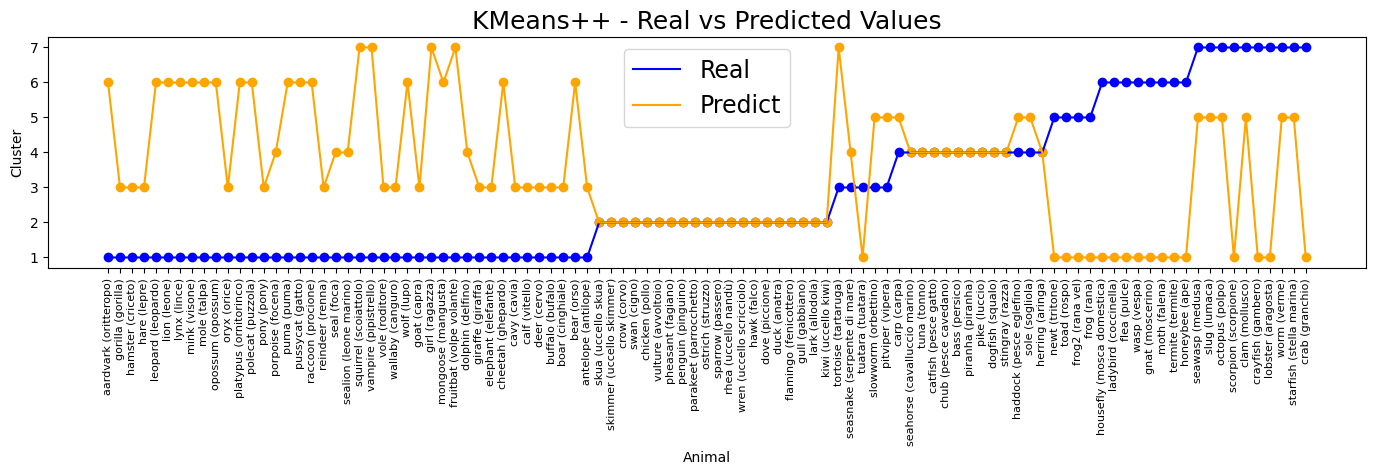

In [99]:
#graphic match
y_real, y_predicted=ut.plot_res(merged_df_kmplus, 'KMeans++ - Real vs Predicted Values')

In [100]:
#Check accurancy
acc_kmp=ut.accurancy(y_real, y_predicted)
kmp_acc =acc_kmp.copy()

#https://www.kaggle.com/code/kmkarakaya/multi-label-model-evaluation

Accuratezza: 0.297


Pair confusion Matrix of KMean++ 
[[7366  380]
 [1230 1124]]

Rand index: 0.841
Precision: 0.747
Recall: 0.477
F1: 0.583


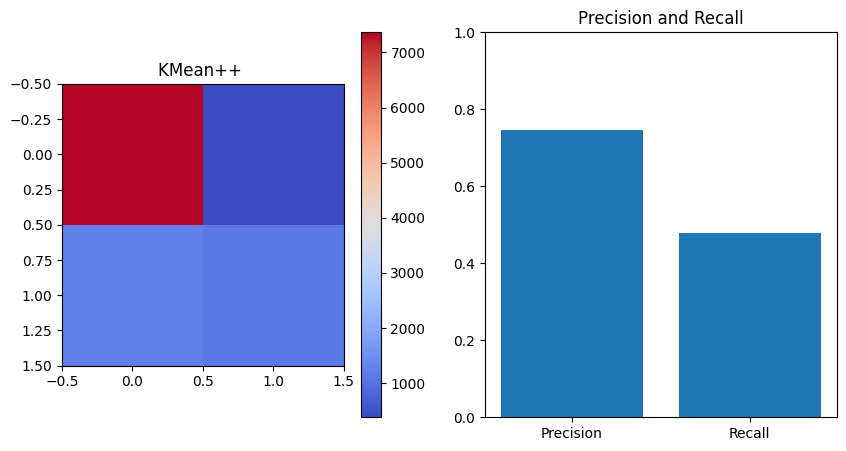

In [101]:
#Show Matrix
ut.pair_conf_matrix(y_real, y_predicted, 'KMean++ ')

### Elbow Method

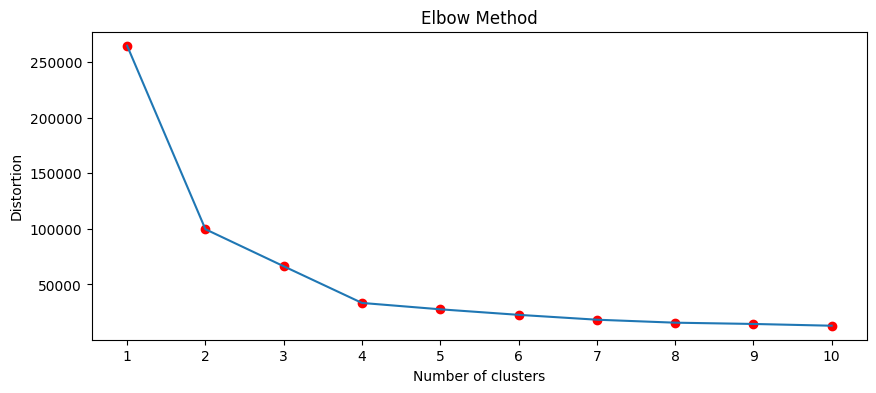

Inertia: 18321.77


In [102]:
#Elbow Method
kmeans.inertia_ #ex kmplus_clustering.inertia_

inertias = []
for i in np.arange(1,11):
    km = KMeans(n_clusters= i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

#plotting inertias values
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1,11),inertias)
plt.scatter(np.arange(1,11),inertias, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(1,11))
plt.show()

print('Inertia: %.2f' % kmeans.inertia_)

#### Osservazioni:
Il metodo suggerisce sommariamento il numero ottimale di clusters, in questo caso pari a 4

### Silhouette score

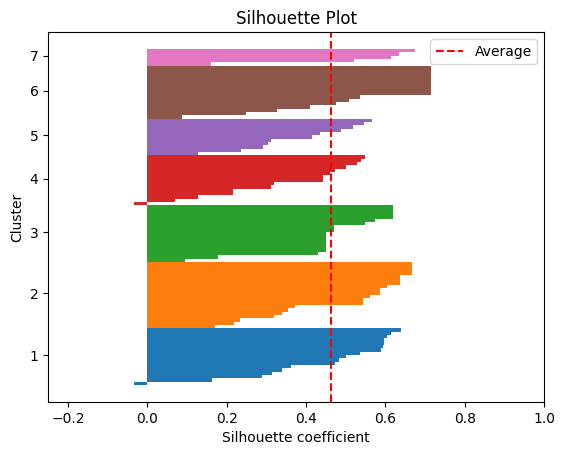

Media:0.462


In [103]:
ut.plot_silhouette(X, kmeans, title='Silhouette Plot')

DA RISCRIVERE!!

#### Osservazioni:

Dal grafico possiamo capire che, non essendoci valori inferiori allo zero, non ci sono punti in cluster errati. I raggrupamenti migliori sono quelli che hanno molti punti vicino alla media: blu, arancione, rossa, marrone. I restanti: verde, viola e rosa risultano invece i raggruppamenti più problematici. 
In conclusione, il profilo di siluette non è dei migliori, benchè il punteggio di silhouette di ciascun cluster è superiore alla media, ci sono ampie fluttuazioni nelle dimensioni dei diversi raggruppamenti, che hanno inoltre spessore differente e profili disomogenei.

https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/


Giusto per vedere come cambia il Silouette score, impostiamo 3 cluster invece di 7.

In [104]:
#K-Means - init 'k-means++' (selected 3 clusters to compare with 7 clusters)
kmeans, y_kmplus_clustering = ut.km_clust(X, n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=0)

Etichette univoche dei cluster: [1 2 3 4]


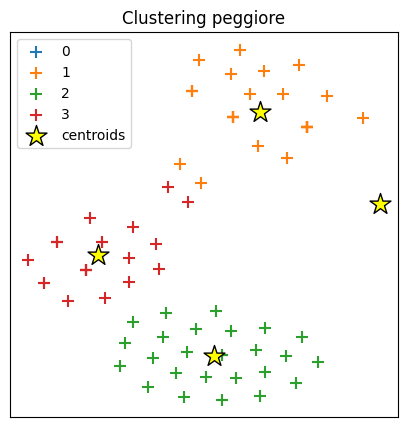

In [105]:
#Bad clustering
fig = plt.figure(figsize=(5, 5))
for i, c in enumerate(np.unique(kmeans.labels_)):
    plt.scatter(X[y_kmplus_clustering == c, 0],
            X[y_kmplus_clustering == c, 1],
            s=67,
            color=plt.cm.tab10(c),
            marker='+',
            label=str(c))

plt.title('Clustering peggiore')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, marker='*', color='yellow', edgecolor='black', label='centroids')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

#### Osservazioni:
Dal grafico, ancor prima di procedere con il plot del Silhouette score, è già evidente che esistono punti assegnati in maniera errata, oltre che un centroide senza cluster.

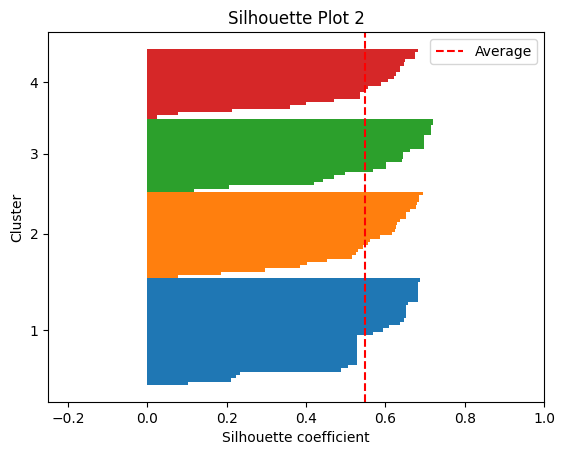

Media:0.548


In [106]:
ut.plot_silhouette(X, kmeans, title='Silhouette Plot 2')

#### Osservazioni:

Il grafico conferma che 4 è il numero di cluster sbagliato, seppur suggerito dall'elbrow metod. Si notano distintamente le dimensioni eterogenee nei raggruppamenti e profili di silouette altamente frastagliati

https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

<div class="alert alert-info" style= "background-color:white; color:blue; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> Il Clustering gerarchico - Agglomerative Clustering</h2>
</div>

Aggrega per vicinanza di punti e vicinanza di cluster in modo gerarchico fino ad arrivare al numero di cluster impostato 

In [107]:
#take data's T-Sne
X = data_reduced

#AgglomerativeClustering (selected 7 clusters to compare with class.csv)
y_ac_blob_s = ut.agglomerative_clust(X, n_clusters=7, affinity='euclidean', linkage='single')
y_ac_blob_c = ut.agglomerative_clust(X, n_clusters=7, affinity='euclidean', linkage='complete')
y_ac_blob_a = ut.agglomerative_clust(X, n_clusters=7, affinity='cosine', linkage='average')

Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]


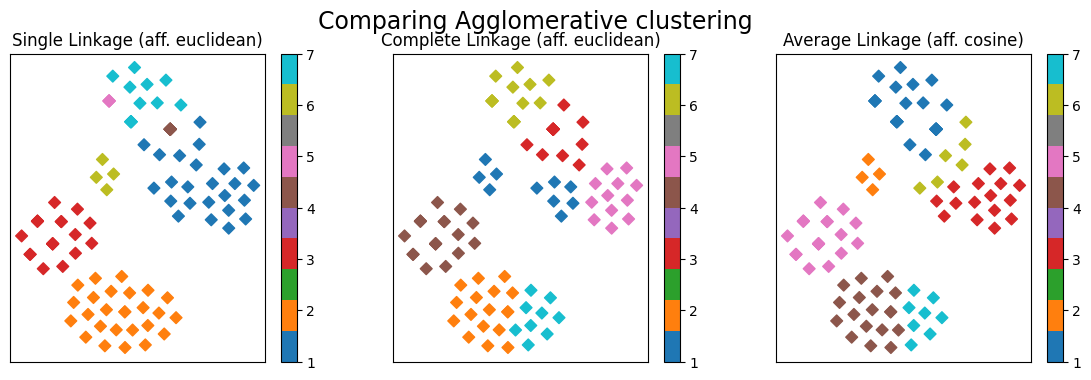

In [108]:
#Comparing different way to group data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
ut.scatter_plot(X, c=y_ac_blob_s[1], title='Single Linkage (aff. euclidean)', cmap='tab10', marker='D', ax=ax1)
ut.scatter_plot(X, c=y_ac_blob_c[1], title='Complete Linkage (aff. euclidean)', cmap='tab10', marker='D', ax=ax2)
ut.scatter_plot(X, c=y_ac_blob_a[1], title='Average Linkage (aff. cosine)', cmap='tab10', marker='D', ax=ax3)
fig.suptitle("Comparing Agglomerative clustering", fontsize=17, y=0.99)
plt.savefig('3.Graphics/Comparazione Agglomerative clustering_Lancio1.png')
plt.show()

RISCRIVEREEEEE

#### Osservazioni:
Il grafico mostra che la prima forma di raggruppamento, la "x linkage" raggruppa i punti in modo più omogeneo ai rispettivi cluster. Nel raggruppamento "x linkage" invece si nota come i raggruppamneti siano disomogenei.

Scegliamo quindi di considerare il raggruppamento per vicinanza maggiore cioè il **x Linkage**, visto che è più probabile che animali con caratteristiche simili facciano parte della stessa categoria.

In [109]:
#Extract the algorithm's results of Average 
df_cl=ut.results_group(X, df_nc, y_ac_blob_a[1], 'Agglom Clustering Average Cosine')

Algoritmo Agglom Clustering Average Cosine 

Pred Labels 1
antelope (antilope)
bear (orso)
boar (cinghiale)
buffalo (bufalo)
calf (vitello)
cavy (cavia)
cheetah (ghepardo)
deer (cervo)
elephant (elefante)
giraffe (giraffa)
goat (capra)
gorilla (gorilla)
hamster (criceto)
hare (lepre)
leopard (leopardo)
lion (leone)
lynx (lince)
mole (talpa)
mongoose (mangusta)
oryx (orice)
polecat (puzzola)
pony (pony)
puma (puma)
pussycat (gatto)
raccoon (procione)
reindeer (renna)
vole (roditore)
wallaby (canguro)
wolf (lupo)
Totale: 29 

Pred Labels 2
fruitbat (volpe volante)
girl (ragazza)
squirrel (scoiattolo)
vampire (pipistrello)
Totale: 4 

Pred Labels 3
crab (granchio)
crayfish (gambero)
flea (pulce)
frog (rana)
frog2 (rana vel)
gnat (moscerino)
honeybee (ape)
housefly (mosca domestica)
ladybird (coccinella)
lobster (aragosta)
moth (falena)
newt (tritone)
scorpion (scorpione)
termite (termite)
toad (rospo)
wasp (vespa)
Totale: 16 

Pred Labels 4
bass (persico)
carp (carpa)
catfish (pesce gatto

In [110]:
#save df_cl in new df_ag_avcs
df_ag_avcs = df_cl.copy()
df_ag_avcs.head(3)

Animal Pred Labels
0  aardvark (oritteropo)           6
1    antelope (antilope)           1
2         bass (persico)           4

In [111]:
#merge results(predict labels) with real labels and create file.csv
merged_df_ag_avcs=ut.merge(df_zoo, df_ag_avcs, namecsv='2.dfmerge_ag_avcs')

Esportato file 2.dfmerge_ag_avcs.csv nella cartella 4.Merge del progetto


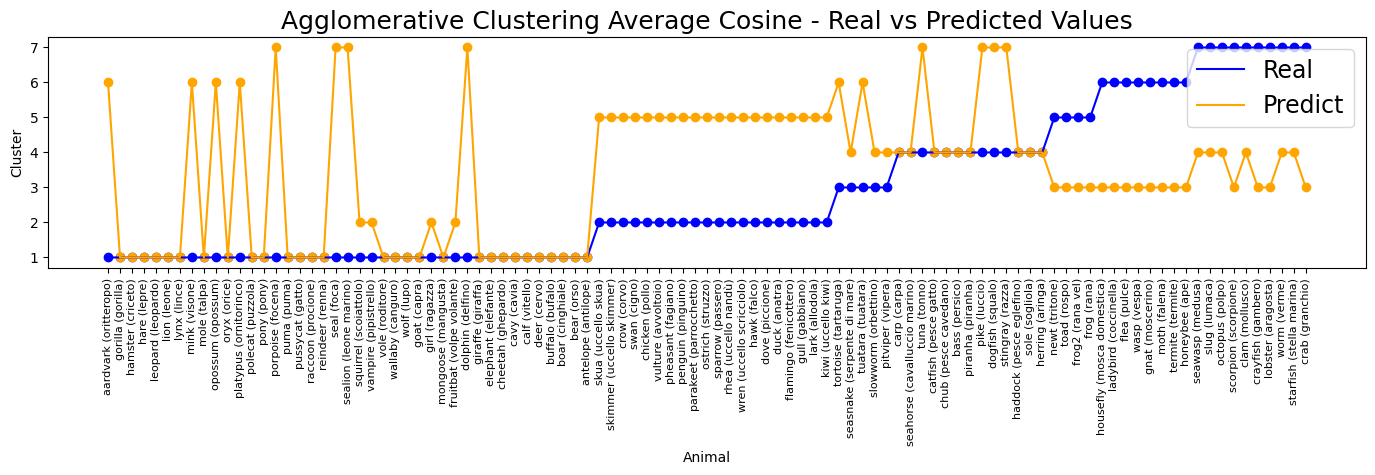

In [112]:
#graphic match
y_real, y_predicted=ut.plot_res(merged_df_ag_avcs, 'Agglomerative Clustering Average Cosine - Real vs Predicted Values')

In [113]:
#Check accurancy
acc_ac=ut.accurancy(y_real, y_predicted)
agg_acc =acc_ac.copy()

Accuratezza: 0.376


Pair confusion Matrix of Agglomerative
[[7340  406]
 [ 924 1430]]

Rand index: 0.868
Precision: 0.779
Recall: 0.607
F1: 0.683


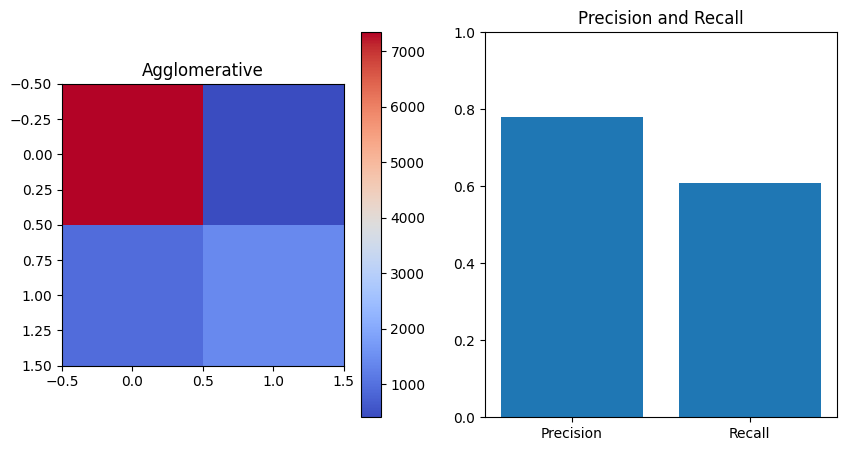

In [114]:
#Show Matrix
ut.pair_conf_matrix(y_real, y_predicted, 'Agglomerative')

<div class="alert alert-info" style= "background-color:white; color:orange; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> Il DBScan </h2>
</div>

utilizza la stima della densità, identifica regioni di punti + dense

In [115]:
#take data's T-Sne
X = data_reduced

#dbscan clustering 
labels_e = ut.dbscan_clust(X, eps= 1.1, min_samples= 3, metric='euclidean')
labels_m = ut.dbscan_clust(X, eps= 1.1, min_samples= 3, metric='mahalanobis')

Etichette univoche dei cluster: [1 2 3 4 5 6]
Etichette univoche dei cluster: [1 2 3 4 5 6]


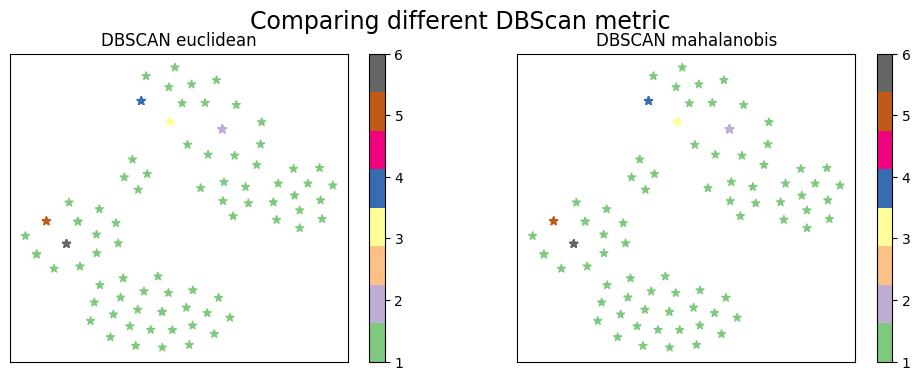

In [116]:
#Comparing different metrics
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ut.scatter_plot(X, c=labels_e[1], title='DBSCAN euclidean', cmap='Accent', marker='*', ax=ax1)
ut.scatter_plot(X, c=labels_m[1], title='DBSCAN mahalanobis', cmap='Accent', marker='*', ax=ax2)
fig.suptitle("Comparing different DBScan metric", fontsize=17, y=0.99)
plt.savefig('3.Graphics/Comparazione metriche DBScan_Lancio1.png')
plt.show()

#### Osservazioni:
Il grafico mostra che i punti non sono assegnati in modo corretto ai rispettivi cluster, ad esempio almeno un punto verde acqua potrebbe essere assegnato al cluster rosa.

In [117]:
#Extract the algorithm's results
df_cl=ut.results_group(X, df_nc, labels_m[1] , 'DB Scan mahalanobis')

Algoritmo DB Scan mahalanobis 

Pred Labels 1
aardvark (oritteropo)
antelope (antilope)
bass (persico)
carp (carpa)
catfish (pesce gatto)
cavy (cavia)
chicken (pollo)
chub (pesce cavedano)
clam (mollusco)
crab (granchio)
crayfish (gambero)
crow (corvo)
dogfish (squalo)
dolphin (delfino)
dove (piccione)
duck (anatra)
flamingo (fenicottero)
flea (pulce)
frog (rana)
frog2 (rana vel)
fruitbat (volpe volante)
girl (ragazza)
gnat (moscerino)
gorilla (gorilla)
haddock (pesce eglefino)
hamster (criceto)
hare (lepre)
hawk (falco)
herring (aringa)
honeybee (ape)
housefly (mosca domestica)
kiwi (uccello kiwi)
ladybird (coccinella)
lobster (aragosta)
mink (visone)
mole (talpa)
moth (falena)
newt (tritone)
octopus (polpo)
opossum (opossum)
ostrich (struzzo)
parakeet (parrocchetto)
penguin (pinguino)
pike (luccio)
piranha (piranha)
pitviper (vipera)
platypus (ornitorinco)
porpoise (focena)
pussycat (gatto)
rhea (uccello nandù)
scorpion (scorpione)
seahorse (cavalluccio marino)
seal (foca)
sealion (l

In [118]:
#save df_cl in new df_DBs_mahalanobis
df_DBs_mahalanobis = df_cl.copy()
df_DBs_mahalanobis.head(3)

Animal Pred Labels
0  aardvark (oritteropo)           1
1    antelope (antilope)           1
2         bass (persico)           1

In [119]:
#merge results(predict labels) with real labels and create file.csv
merged_df_DBs_mahalanobis=ut.merge(df_zoo, df_DBs_mahalanobis, namecsv='3.dfmerge_DBs_mahalanobis')

Esportato file 3.dfmerge_DBs_mahalanobis.csv nella cartella 4.Merge del progetto


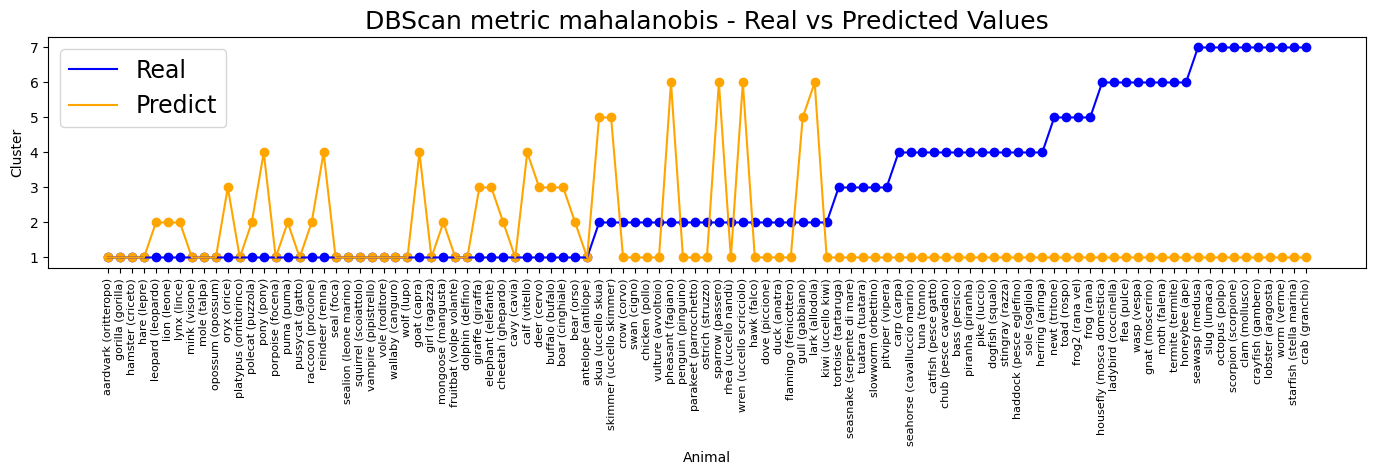

In [120]:
#graphic match
y_real, y_predicted=ut.plot_res(merged_df_DBs_mahalanobis, 'DBScan metric mahalanobis - Real vs Predicted Values')

In [121]:
#Check accurancy
acc_db=ut.accurancy(y_real, y_predicted)
db_acc =acc_db.copy()

Accuratezza: 0.218


Pair confusion Matrix of DBScan Mahalanobis
Pair confusion matrix
[[3148 4598]
 [1270 1084]]

Rand index: 0.419
Precision: 0.191
Recall: 0.460
F1: 0.270


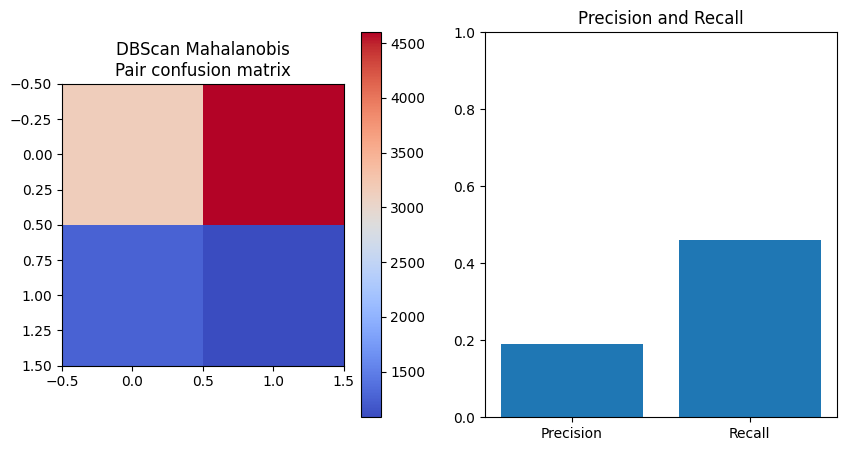

In [122]:
#Show Matrix
ut.pair_conf_matrix(y_real, y_predicted, 'DBScan Mahalanobis\nPair confusion matrix')

<div class="alert alert-info" style="background-color:LightGreen; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 3. Risultati a confronto </h2>
</div>

In [123]:
X = data_reduced

In [124]:
kmeans, y_kmplus_clustering = ut.km_clust(X, n_clusters=7, init='k-means++', 
                                               n_init=10, max_iter=300, tol=1e-4, random_state=1234)
y_ac_blob_a = ut.agglomerative_clust(X, n_clusters=7, affinity='cosine', linkage='average')
labels_m = ut.dbscan_clust(X, eps= 1.1, min_samples= 3, metric='mahalanobis')

Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6]


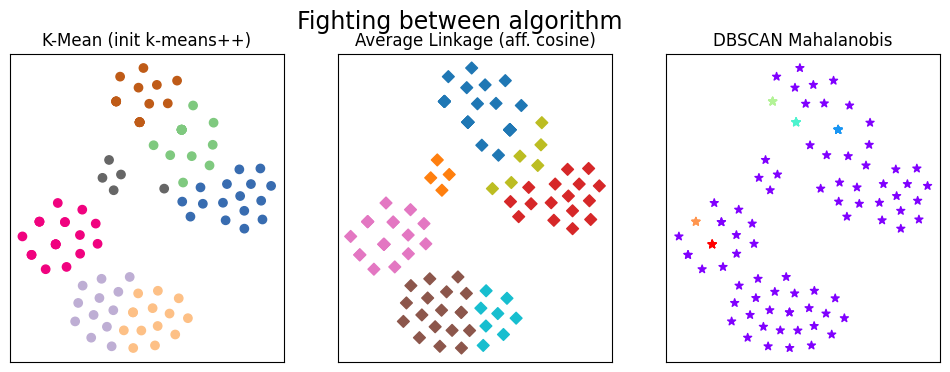

In [125]:
#Comparing different way to group data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ut.scatter_plot(X, c=y_kmplus, title='K-Mean (init k-means++)', cmap='Accent', marker='o', colorbar=False, ax=ax1)
ut.scatter_plot(X, c=y_ac_blob_a[1], title='Average Linkage (aff. cosine)', cmap='tab10', marker='D', colorbar=False, ax=ax2)
ut.scatter_plot(X, c=labels_m[1], title='DBSCAN Mahalanobis', cmap='rainbow', marker='*', colorbar=False, ax=ax3)
fig.suptitle("Fighting between algorithm", fontsize=17, y=0.99)
plt.savefig('3.Graphics/Tre algoritmi a confronto_Lancio1.png')
plt.show()

#edgecolor='red',

In [126]:
#Comparing different accuracy
print('kmp_accuracy,:%.3f' % kmp_acc,'  agg_accuracy,:%.3f' % agg_acc, '  db_accuracy,:%.3f' % db_acc)

kmp_accuracy,:0.297   agg_accuracy,:0.376   db_accuracy,:0.218


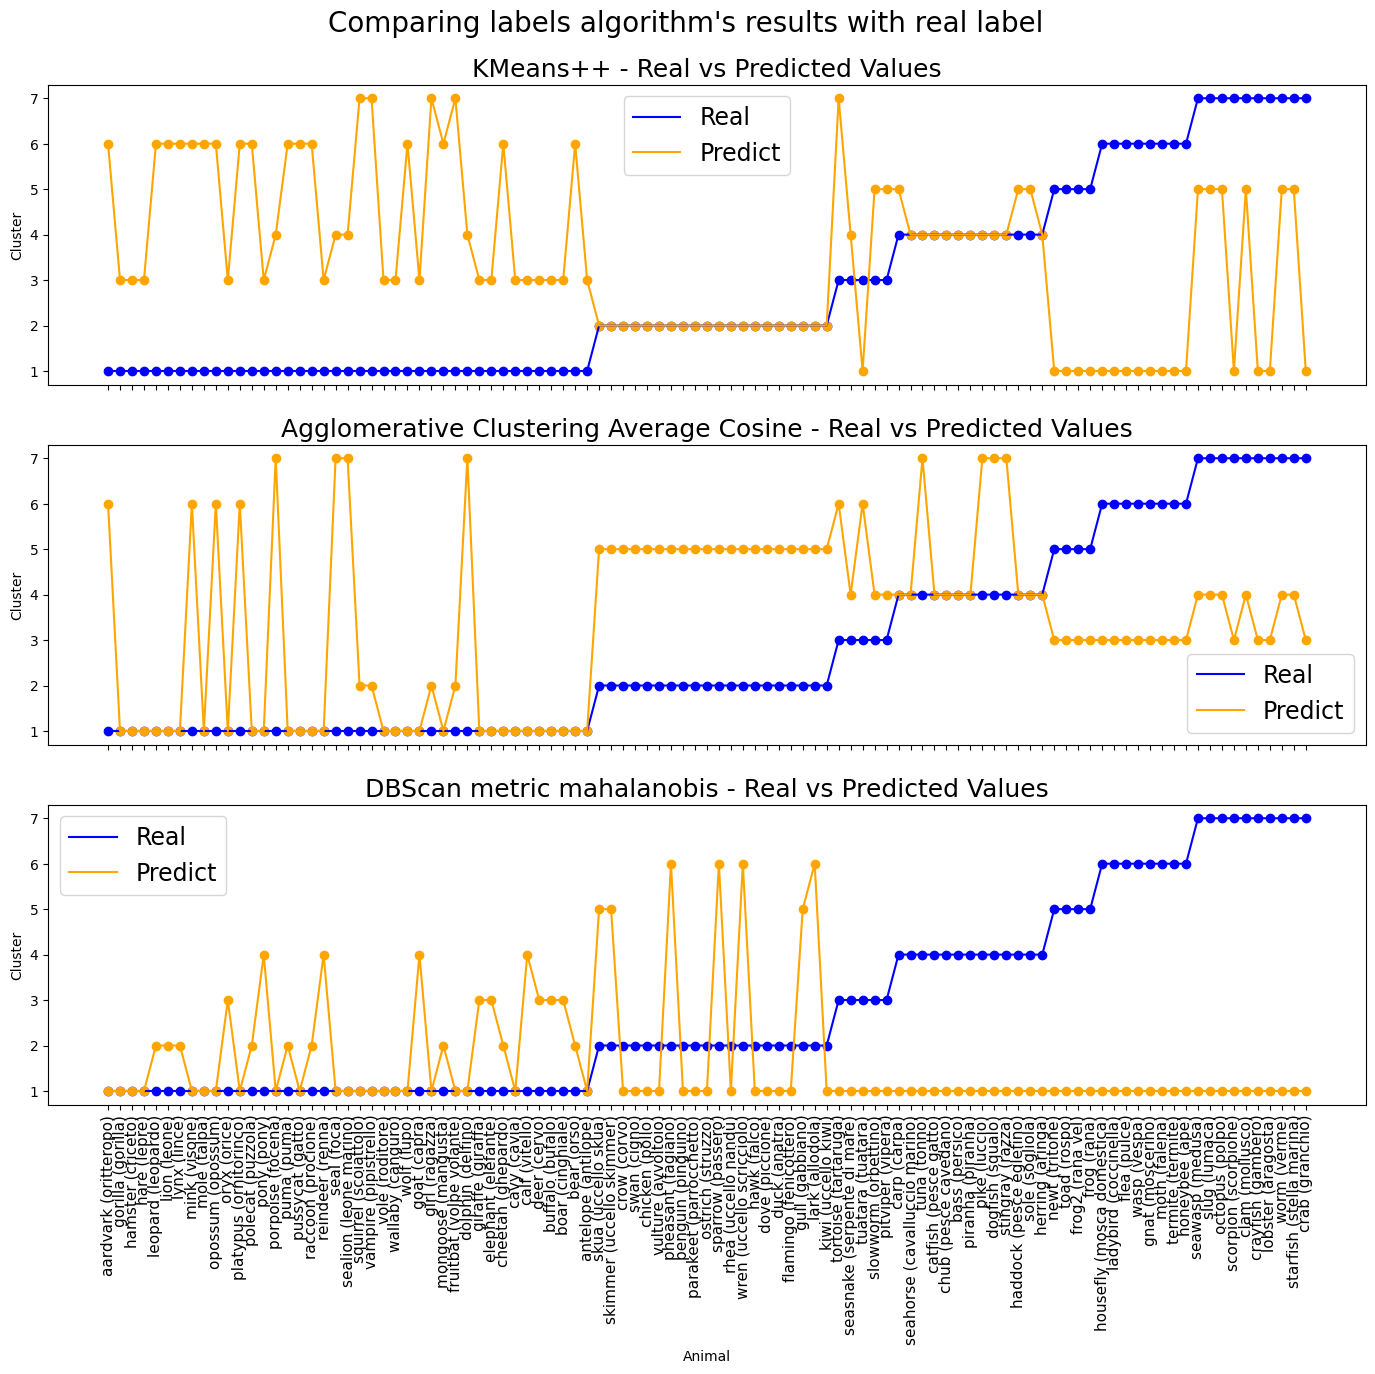

In [127]:
#Comparing different results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(17, 15))
ut.plot_res(merged_df_kmplus, 'KMeans++ - Real vs Predicted Values', ax=ax1)
ax1.set_xticklabels([]) #animal's name
ax1.set_xlabel('') #Animals
ut.plot_res(merged_df_ag_avcs, 'Agglomerative Clustering Average Cosine - Real vs Predicted Values', ax=ax2)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ut.plot_res(merged_df_DBs_mahalanobis, 'DBScan metric mahalanobis - Real vs Predicted Values', ax=ax3)
ax3.tick_params(axis='x', rotation=90, labelsize=11)
fig.suptitle("Comparing labels algorithm's results with real label", fontsize=20, y=0.93)
#fig.subplots_adjust(hspace=0.13)
fig.subplots_adjust(bottom=0.2)
plt.savefig('3.Graphics/Etichette reali e predette a confronto_Lancio1.png')
plt.show()